# Analysis for Continuous Improvement

Author Name: Anthony Valentino

9-digit PID: 730466997

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template "The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. The course should input grades into Sakai or some other platform because it will allow enrolled students to see organized grades, percentage grades, and final grades, all of which cannot be seen in Gradescope.
2. The course should limit the amount of non-Computer Science majors allowed to enroll because it will make it easier for the Computer Science majors who absolutely need the course to enroll.
3. The course should include enrollment in attendance-optional recitiations because it will provide a set time for students to get help, allowing the instructional staff to reduce the amount of time dedicated to office hours and tutoring.
4. The course should limit the amount of upper-classmen allowed to enroll because it will make enrollment easier for the younger students who are more likely to be taking the course out of need rather than interest. Plus, these younger students are already at a disadvantage due to later enrollment dates/times.
5. During quizzes/tests students should be allowed a notecard or cheat sheet to write notes on because they will always have these resources in a real-world scenario and it will allow the students to avoid simple mistakes or blunders.

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

1. Idea without sufficient data to analyze: The course should input grades into Sakai or some other platform because it will allow enrolled students to see organized grades, percentage grades, and final grades, all of which cannot be seen in Gradescope.

2. Suggestion for how to collect data to support this idea in the future: In the future, the instructional staff should include questions on the anonymous survey asking students for their opinion on the practicality of both the course website and Gradescope. From this information the staff can decide what changes need to be made in order to improve the students' ability to navigate/submit assignments as well as view their grades.

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

1. Idea to analyze with available data: The course should include enrollment in attendance-optional recitiations because it will provide a set time for students to get help, allowing the instructional staff to reduce the amount of time dedicated to office hours and tutoring.

2. This idea is more valuable than the others brainstormed because: This idea helps both the students and the instructional staff. An attendance-optional recitation would not only provide all students with a set day and time to get help on assignments, but it will also allow the instructional team to reduce the amount of office hours since demand will likely decrease as a result of students using recitation rather than office hours for help.


## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interleave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [141]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`.

In [142]:
from data_utils import read_csv_rows, column_values, columnar, head, select, concat, count, sift, avg_from_strings

Next, ... (you take it from here and add additional code and markdown cells to read in the CSV file and process it as needed)

In [143]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

**Analysis Overview**

To perform my analysis I will be using two main columns, the oh_visits column and the all_sync column. I will use these columns to find out whether people who visit office hours for help more often are more likely to attend a recitation for help. I will do this by categorizing the responses by the amount of oh_visits they put down (0 through 5) then finding the average response for whether a student would prefer all-synchronous classes (1 through 7) for each category.

**Formatting the Data**

First, I will be using the `read_csv_rows` function to read the survey data and allocate it into rows so that I can work with the data, making sure that all 35 columns and 620 rows are accounted for.

In [144]:
data_rows: list[dict[str, str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)

if len(data_rows) == 620 and len(data_rows[0].keys()) == 35:
    print("It's all good bro, we chillin.")
else:
    print("It's not all good bro, we not chillin.")

It's all good bro, we chillin.


Second, in order to work with this data more easily, I will be transforming the row-oriented table into a column-oriented table using the `columnar` function. I will ensure this has been done correctly by using the `head` and `tabulate` funciton to display the first three rows.

In [145]:
from tabulate import tabulate

data_cols: dict[str, list[str]] = columnar(data_rows)

data_cols_three_rows: dict[str, list[str]] = head(data_cols, 3)

tabulate(data_cols_three_rows, data_cols_three_rows.keys(), "html")

row,year,unc_status,comp_major,primary_major,data_science,prereqs,prior_exp,ap_principles,ap_a,other_comp,prior_time,languages,hours_online_social,hours_online_work,lesson_time,sync_perf,all_sync,flipped_class,no_hybrid,own_notes,own_examples,oh_visits,ls_effective,lsqs_effective,programming_effective,qz_effective,oh_effective,tutoring_effective,pace,difficulty,understanding,interesting,valuable,would_recommend
0,22,Returning UNC Student,No,Mathematics,No,"MATH 233, MATH 347, MATH 381",7-12 months,No,No,UNC,1 month or so,"Python, R / Matlab / SAS",3 to 5 hours,0 to 2 hours,6,2,2,1,2,4,4,0,7,3,7,5,,,1,1,7,5,6,5
1,25,Returning UNC Student,No,Mathematics,Yes,"MATH 130, MATH 231, STOR 155",None to less than one month!,,,,,,0 to 2 hours,5 to 10 hours,4,3,3,1,2,6,4,5,5,5,5,5,7,6,6,6,3,4,6,4
2,25,Incoming First-year Student,Yes - BA,Computer Science,No,"MATH 130, MATH 152, MATH 210",None to less than one month!,,,,,,3 to 5 hours,5 to 10 hours,3,3,4,2,1,7,7,2,5,6,7,7,4,,6,4,6,7,7,7


**Pulling Relevant Data**

Next, I will use the `select` function to create a table that includes the columns `oh_visits` and `all_sync`. I will then use the `head` and `tabulate` functions to display the first 10 rows to ensure that the `select` function was implemented properly.

In [146]:
relevant_cols: list[str] = ["oh_visits", "all_sync"]

table: dict[str, list[str]] = select(data_cols, relevant_cols)

table_ten_rows: dict[str, list[str]] = head(table, 10)

tabulate(table_ten_rows, table_ten_rows.keys(), "html")

oh_visits,all_sync
0,2
5,3
2,4
1,4
5,3
0,2
2,3
0,2
1,4
2,2


Now, I will use a function that I created titled `sift` that will produce a list of values that correspond with a specific value in another column *(ex. returns a list of the majors of all students graduating in 2023.)*. I will use this function to create a list of values for each response to `oh_visits` (0 through 5). To double check this, I will use the `count` function to make sure that the number of values on each list of all_sync matches the count of its corresponding oh_value.

In [147]:
oh_visits_0: list[str] = sift(table, "oh_visits", "0", "all_sync")
oh_visits_1: list[str] = sift(table, "oh_visits", "1", "all_sync")
oh_visits_2: list[str] = sift(table, "oh_visits", "2", "all_sync")
oh_visits_3: list[str] = sift(table, "oh_visits", "3", "all_sync")
oh_visits_4: list[str] = sift(table, "oh_visits", "4", "all_sync")
oh_visits_5: list[str] = sift(table, "oh_visits", "5", "all_sync")

counts: dict[str, int] = count(table["oh_visits"])

if len(oh_visits_0) == counts["0"] and len(oh_visits_1) == counts["1"] and len(oh_visits_2) == counts["2"] and len(oh_visits_3) == counts["3"] and len(oh_visits_4) == counts["4"] and len(oh_visits_5) == counts["5"]:
    print("All is well.")
else:
    print("All is not well, panic immediately.")

All is well.


**Results**

Lastly, I will calculate and print the averages for each list of string values using a function I created called `avg_from_strings`.

In [148]:
print("Preference (from 1 to 7) for all-synchronous classes for people who visit office hours:")
print(f"0 times: {avg_from_strings(oh_visits_0)}")
print(f"1 times: {avg_from_strings(oh_visits_1)}")
print(f"2 times: {avg_from_strings(oh_visits_2)}")
print(f"3 times: {avg_from_strings(oh_visits_3)}")
print(f"4 times: {avg_from_strings(oh_visits_4)}")
print(f"5 times: {avg_from_strings(oh_visits_5)}")

Preference (from 1 to 7) for all-synchronous classes for people who visit office hours:
0 times: 2.4008438818565403
1 times: 2.5950920245398774
2 times: 3.1473684210526316
3 times: 3.1690140845070425
4 times: 3.423076923076923
5 times: 3.642857142857143


**Visualizations**

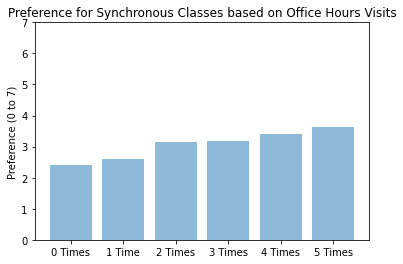

In [149]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['0 Times', '1 Time', '2 Times', '3 Times', '4 Times', '5 Times']
y_pos = [0, 1, 2, 3, 4, 5]  # the order the labels will be arranged in bar chart
performance = [2.40,2.60,3.15,3.17,3.42,3.64]
plt.ylim([0, 7]) 

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Preference (0 to 7)')
plt.title('Preference for Synchronous Classes based on Office Hours Visits')

plt.show()

## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysis results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion



Based on my results, it seems that the students who have to visit office hours for help more often are more likely to have a preference for entirely synchronous classes. This means that students who visit office hours often will probably be more likely to want to attend an additional lecture, such as an attendance-optional recitation. For this reason, I believe that there is a market for an attendance-optional recitation, which could serve as the replacement for at least one visit to office hours, reducing the demand for office hours in the process.

There could be several potential problems with this idea: 
1. Although students would have a place to go for help, they may attend office hours instead anyway, causing the demand for office hours to remain the same and wasting the time of a the instructional staff holding a recitiation. 
2. Recitations could be disproportionate in their attendance and length depending on the amount of help the students in each recitation need. 
3. These recitations would take up time and space in an academic building, introducing a cost to the academic institution. 
4. A recitation could make it harder for students to accomodate their class schedule for COMP 110. 
5. It would be harder for students to get individual attention in a recitation with one TA rather than office hours with several TAs.

Finally, as for potential extensions or refinements to the idea, in order to further explore this idea a survey could be done on COMP 110 students to attempt to estimate whether the demand for office hours would decrease enough to warrant the implementation of an attendance-optional recitation. This survey could also be used to determine if the students would be open to such an idea.